<a href="https://colab.research.google.com/github/saif-islam-rayhan/DataScience-and-ML/blob/main/Module4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Regression Models on Housing Dataset

# 1. Introduction:

In this project, we will build and compare Linear Regression, Ridge Regression, and Lasso Regression models on the Housing dataset.
We will also check for missing data and visualize some features before training.
Finally, we will evaluate the models using MSE, RMSE, R², and MAE.

# 2. Import Libraries




In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 3. Load Dataset

In [13]:
# Dataset URL
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"

# Column names from Boston Housing Dataset
columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
           'RAD','TAX','PTRATIO','B','LSTAT','MEDV']

# Read dataset
df = pd.read_csv(data_url, delim_whitespace=True, names=columns)

print("Dataset Loaded Successfully")
df.head()


/tmp/ipython-input-563298258.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_url, delim_whitespace=True, names=columns)


Dataset Loaded Successfully


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# 4. Check for Missing Data

In [14]:
# Check missing values
print("Missing values in each column:\n")
print(df.isnull().sum())


Missing values in each column:

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


# 5. Dataset Visualization

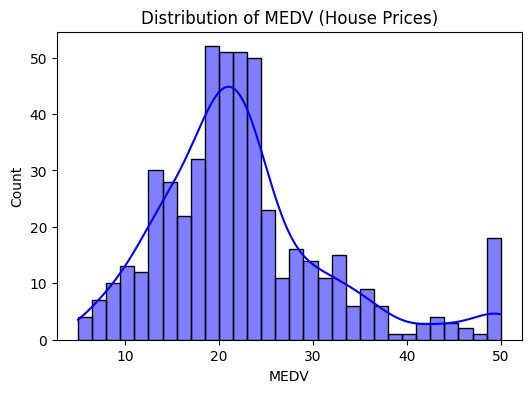

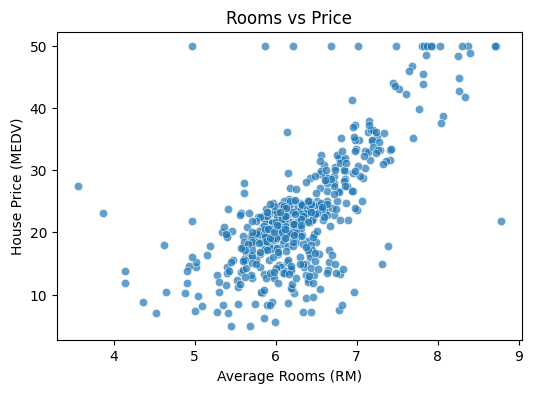

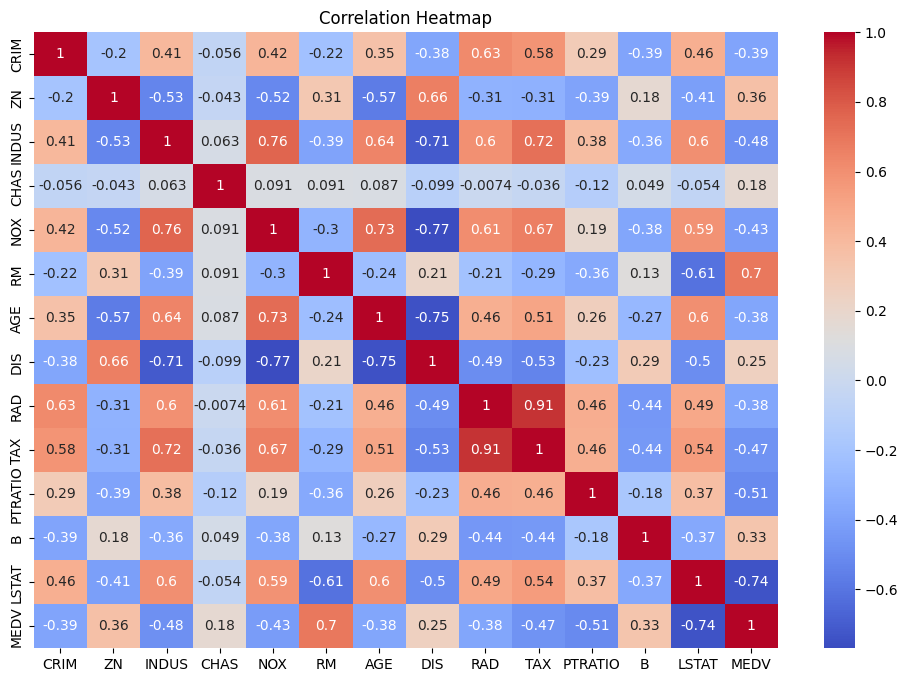

In [15]:
# Distribution of target variable (MEDV)
plt.figure(figsize=(6,4))
sns.histplot(df["MEDV"], kde=True, bins=30, color="blue")
plt.title("Distribution of MEDV (House Prices)")
plt.show()

# Relationship between RM (average rooms per house) and MEDV
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["RM"], y=df["MEDV"], alpha=0.7)
plt.title("Rooms vs Price")
plt.xlabel("Average Rooms (RM)")
plt.ylabel("House Price (MEDV)")
plt.show()

# Heatmap for correlations
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# 6. Split Features and Target

In [16]:
X = df.drop("MEDV", axis=1)   # Features
y = df["MEDV"]                # Target

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 7. Train Models

In [17]:
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)   # alpha=1.0 default
lasso_reg = Lasso(alpha=0.1)   # small alpha for Lasso

lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)


Lasso(alpha=0.1)

# 8. Evaluate Models

In [18]:
models = {
    "Linear Regression": lin_reg,
    "Ridge Regression": ridge_reg,
    "Lasso Regression": lasso_reg
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append([name, mse, rmse, r2, mae])

# Comparison Table
results_df = pd.DataFrame(results, columns=["Model", "MSE", "RMSE", "R²", "MAE"])
results_df


,Model,MSE,RMSE,R²,MAE
0,Linear Regression,24.291119,4.928602,0.668759,3.189092
1,Ridge Regression,24.477191,4.947443,0.666222,3.132947
2,Lasso Regression,25.155594,5.015535,0.656971,3.145240


# 9. Visualize Predictions vs Actual

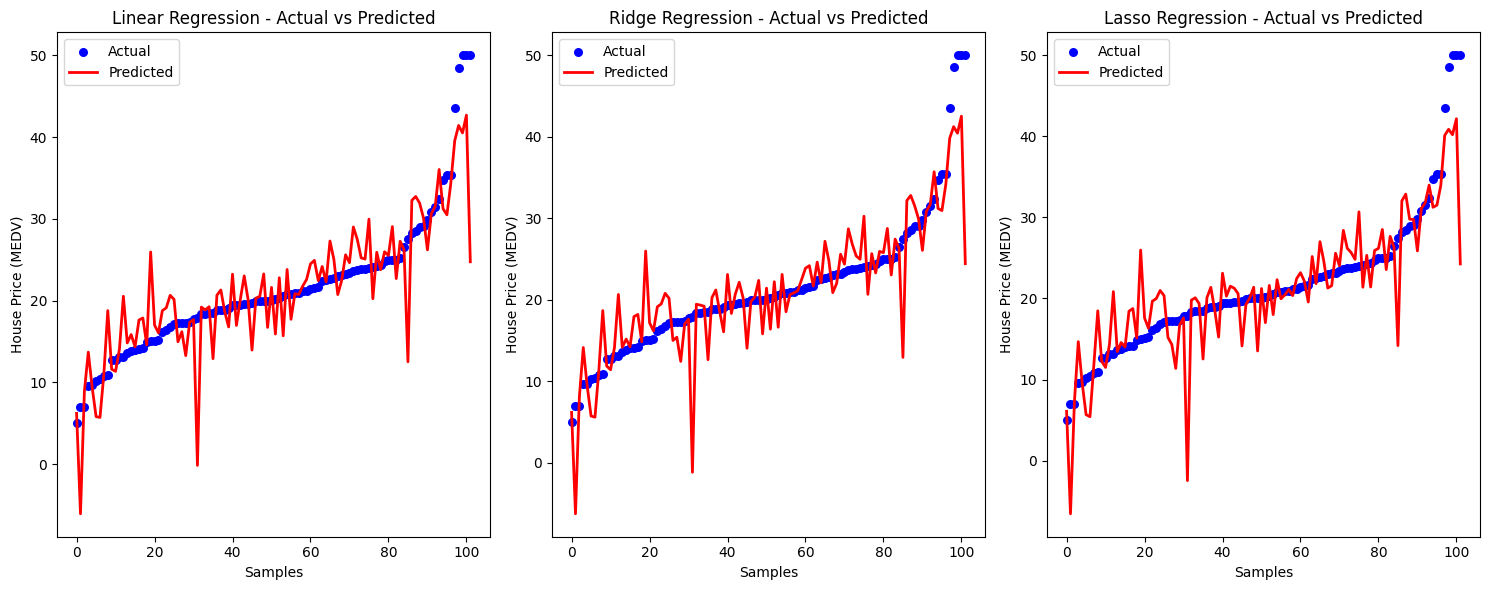

In [21]:
plt.figure(figsize=(15,6))

for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)

    # Sort values for better comparison
    sorted_idx = np.argsort(y_test)
    y_test_sorted = y_test.iloc[sorted_idx]
    y_pred_sorted = y_pred[sorted_idx]

    plt.subplot(1,3,i)
    # Actual values as dots
    plt.scatter(range(len(y_test_sorted)), y_test_sorted, label="Actual", color="blue", s=30)
    # Predicted values as line
    plt.plot(range(len(y_test_sorted)), y_pred_sorted, label="Predicted", color="red", linewidth=2)

    plt.title(f"{name} - Actual vs Predicted")
    plt.xlabel("Samples")
    plt.ylabel("House Price (MEDV)")
    plt.legend()

plt.tight_layout()
plt.show()


# 10. Conclusion:

Linear Regression usually works well but may overfit.

Ridge Regression adds penalty to coefficients → reduces overfitting.

Lasso Regression can shrink some coefficients to zero → useful for feature selection.

From the comparison table, you can decide which model performs better for housing prices.